In [1]:
import uproot as up
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import pandas as pd
import mplhep as hep
hep.style.use(hep.style.CMS)
import ROOT
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/10


In [2]:
# open the file
file = up.open('../output/Data/TTree_13TeV_fourmuon_2018.root')
events = file['ntuple;1']
columns = ['Event', 'Run', 'LumiBlock',
           'Y_TriggerPath',
           'Z_soft1', 'Z_soft2',
           'Z_VtxMass', 'Z_mass',
           'Z_pt1', 'Z_pt2', 'Z_eta1', 'Z_eta2',
           'Z_lowPt', 'Z_highPt',
           'Z_trackIso1', 'Z_trackIso2',
           'Y_VtxMass', 'Y_mass',
           'Y_pt1', 'Y_pt2', 'Y_eta1', 'Y_eta2',
           'Y_mvaIsoWP90_1', 'Y_mvaIsoWP90_2',
           'Z_VtxProb', 'Y_VtxProb',
           'FourL_mass', 'FourL_VtxProb']
# branches = events.arrays(columns, entry_start=430, entry_stop=450)
branches = events.arrays(columns)

In [3]:
def print_summary(data, text):
    events = len(data)
    candidates = np.sum(ak.num(branches['Z_VtxMass'], axis=1))

    print(f"Number of events {text}: {events}")
    print(f"Number of candidates {text}: {candidates}")

In [4]:
cut_YTrigger_candi = branches['Y_TriggerPath']
cut_YTrigger_event = ak.any(cut_YTrigger_candi, axis=1)

branches = branches[cut_YTrigger_candi][cut_YTrigger_event]
branches = branches[ak.num(branches.Z_VtxMass, axis=1) > 0]

print_summary(branches, "Trigger")

Number of events Trigger: 84283
Number of candidates Trigger: 93482


In [5]:
cut_Zsoft_candi = branches['Z_soft1'] & branches['Z_soft2']
cut_Zsoft_event = ak.any(cut_Zsoft_candi, axis=1)

branches = branches[cut_Zsoft_candi][cut_Zsoft_event]

print_summary(branches, "Soft Muons")

Number of events Soft Muons: 76164
Number of candidates Soft Muons: 82514


Number of events Detector: 12019
Number of candidates Detector: 12611


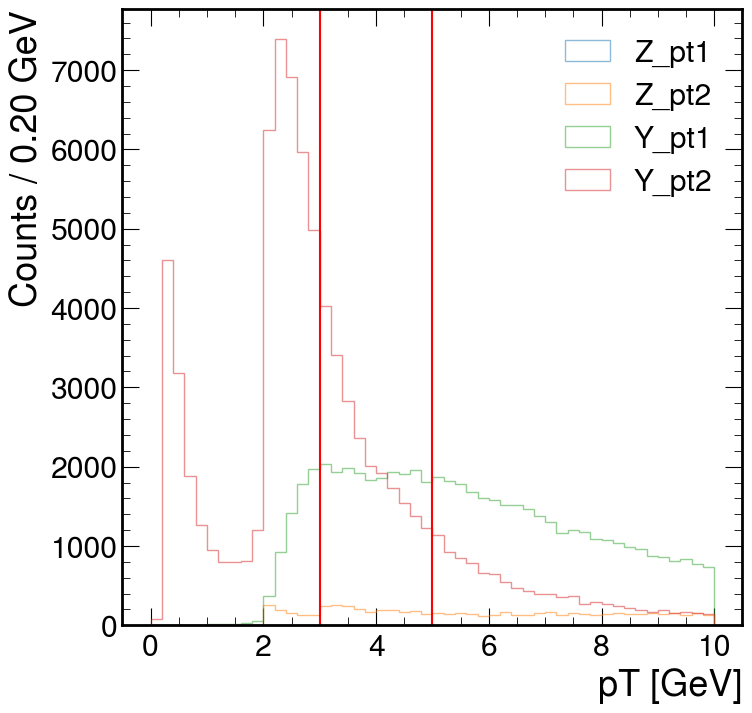

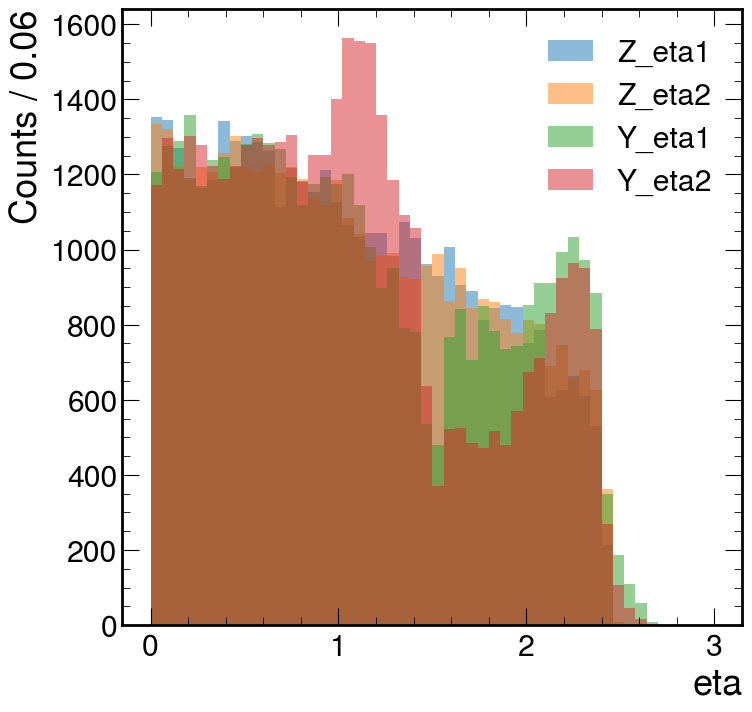

In [6]:
cut_Pt_candi = (branches['Z_pt1'] > 3.0) & (branches['Z_pt2'] > 3.0) & (branches['Y_pt1'] > 5.0) & (branches['Y_pt2'] > 5.0)
cut_eta_candi = (abs(branches['Z_eta1']) < 2.4) & (abs(branches['Z_eta2']) < 2.4) & (abs(branches['Y_eta1']) < 2.5) & (abs(branches['Y_eta2']) < 2.5)
cut_detector_candi = cut_Pt_candi & cut_eta_candi
cut_detector_event = ak.any(cut_detector_candi, axis=1)

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 50, 0, 10
plt.hist(ak.flatten(branches.Z_pt1), bins=nbins, label="Z_pt1", range=(xlow, xhigh), alpha=0.5, histtype='step')
plt.hist(ak.flatten(branches.Z_pt2), bins=nbins, label="Z_pt2", range=(xlow, xhigh), alpha=0.5, histtype='step')
plt.hist(ak.flatten(branches.Y_pt1), bins=nbins, label="Y_pt1", range=(xlow, xhigh), alpha=0.5, histtype='step')
plt.hist(ak.flatten(branches.Y_pt2), bins=nbins, label="Y_pt2", range=(xlow, xhigh), alpha=0.5, histtype='step')
plt.axvline(3.0, color='r')
plt.axvline(5.0, color='r')
plt.xlabel("pT [GeV]")
plt.ylabel(f"Counts / {xhigh/nbins:.2f} GeV")
plt.legend()

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 50, 0, 3
plt.hist(ak.flatten(branches.Z_eta1), bins=nbins, label="Z_eta1", range=(xlow, xhigh), alpha=0.5)  # , histtype='step')
plt.hist(ak.flatten(branches.Z_eta2), bins=nbins, label="Z_eta2", range=(xlow, xhigh), alpha=0.5)  # , histtype='step')
plt.hist(ak.flatten(branches.Y_eta1), bins=nbins, label="Y_eta1", range=(xlow, xhigh), alpha=0.5)  # , histtype='step')
plt.hist(ak.flatten(branches.Y_eta2), bins=nbins, label="Y_eta2", range=(xlow, xhigh), alpha=0.5)  # , histtype='step')
plt.xlabel("eta")
plt.ylabel(f"Counts / {xhigh/nbins:.2f}")
plt.legend()

branches = branches[cut_detector_candi][cut_detector_event]

print_summary(branches, "Detector")

In [7]:
# events with hights pt muon > 24
cut_highPt24_candi = branches['Z_highPt'] > 24
cut_highPt24_event = ak.any(cut_highPt24_candi, axis=1)

branches = branches[cut_highPt24_candi][cut_highPt24_event]

print_summary(branches, "High Pt Muon")

Number of events High Pt Muon: 12013
Number of candidates High Pt Muon: 12602


Number of events Dilepton Vtx: 10973
Number of candidates Dilepton Vtx: 11503


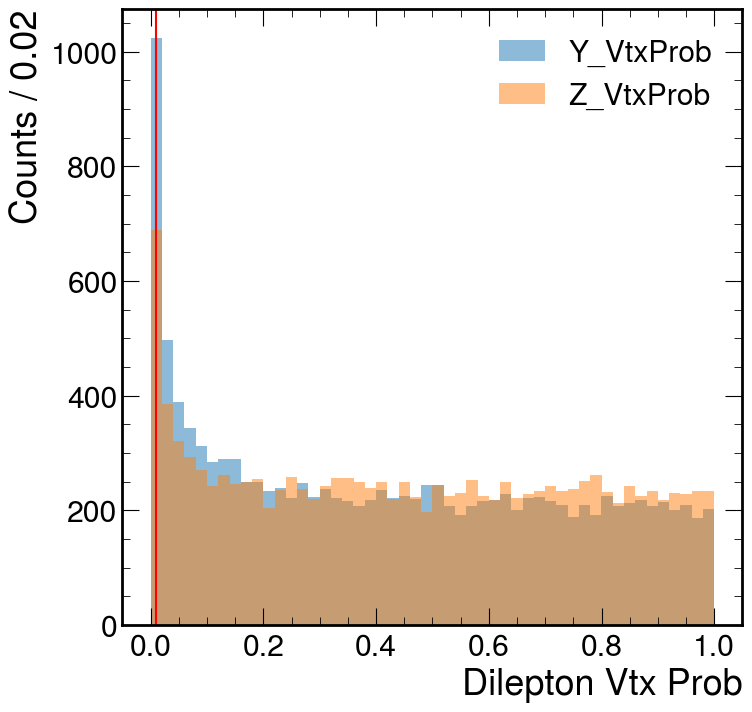

In [8]:
cut_dilepton_candi = (branches['Y_VtxProb'] > 0.01) & (branches['Z_VtxProb'] > 0.01)
cut_dilepton_event = ak.any(cut_dilepton_candi, axis=1)

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 50, 0, 1
plt.hist(ak.flatten(branches.Y_VtxProb), bins=nbins, label="Y_VtxProb", alpha=0.5)
plt.hist(ak.flatten(branches.Z_VtxProb), bins=nbins, label="Z_VtxProb", alpha=0.5)
plt.axvline(x=0.01, color='r')
plt.xlabel('Dilepton Vtx Prob')
plt.ylabel(f"Counts / {xhigh/nbins:.2f}")
plt.legend()

branches = branches[cut_dilepton_candi][cut_dilepton_event]

print_summary(branches, "Dilepton Vtx")

Number of events FourL Vtx: 10149
Number of candidates FourL Vtx: 10637


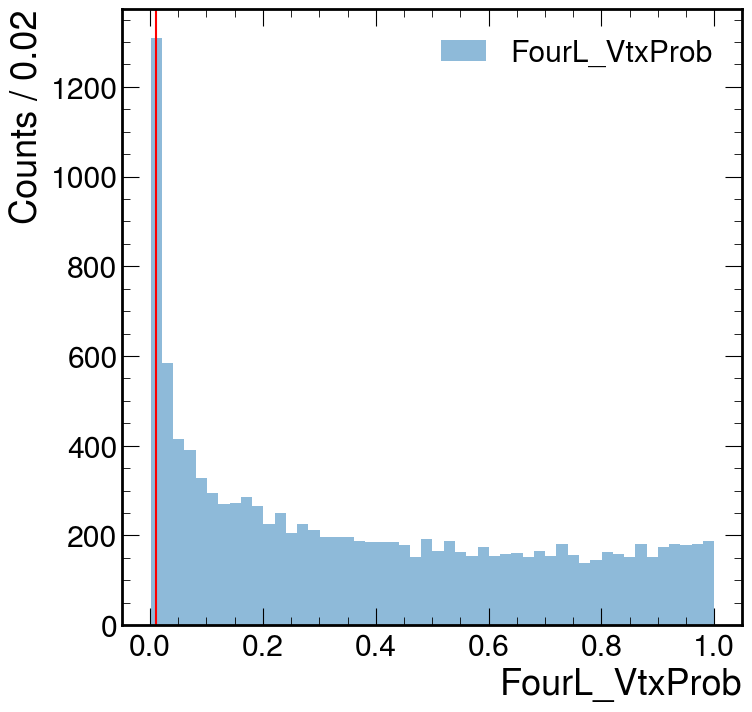

In [9]:
cut_FourL_candi = (branches['FourL_VtxProb'] > 0.01)
cut_FourL_event = ak.any(cut_FourL_candi, axis=1)

plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 50, 0, 1
plt.hist(ak.flatten(branches.FourL_VtxProb), bins=nbins, label="FourL_VtxProb", alpha=0.5)
plt.axvline(x=0.01, color='r')
plt.xlabel('FourL_VtxProb')
plt.ylabel(f"Counts / {xhigh/nbins:.2f}")
plt.legend()

branches = branches[cut_FourL_candi][cut_FourL_event]

print_summary(branches, "FourL Vtx")

Number of events Y mass: 1286
Number of candidates Y mass: 1309


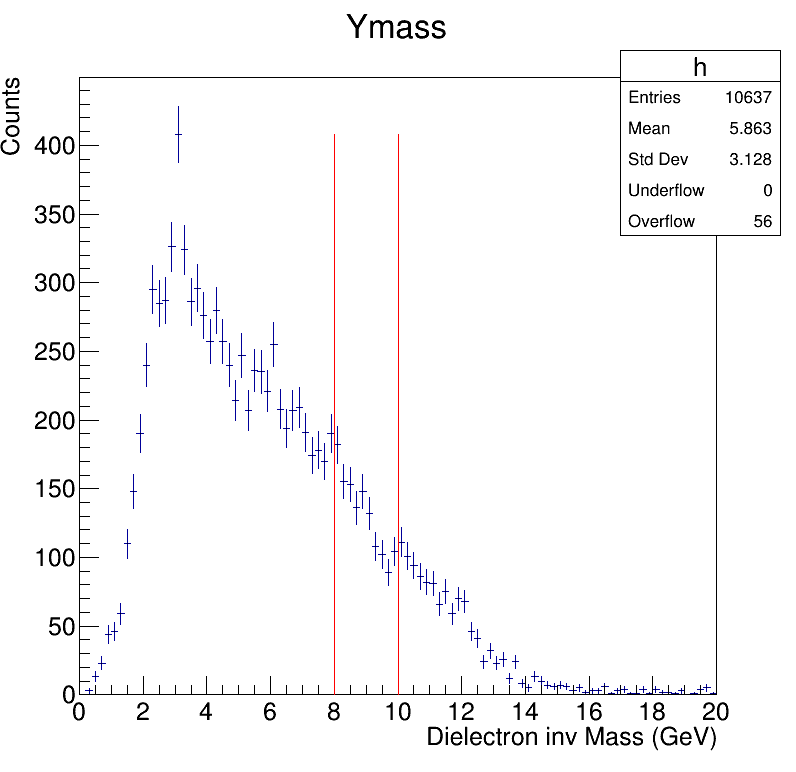

In [10]:
cut_Ymass_candi = (branches['Y_VtxMass'] > 8) & (branches['Y_VtxMass'] < 10)
cut_Ymass_event = ak.any(cut_Ymass_candi, axis=1)

nbins, xlow, xhigh = 100, 0, 20
h = ROOT.TH1F("h", "Ymass", nbins, xlow, xhigh)
for i in ak.flatten(branches.Y_VtxMass):
    h.Fill(i)
c = ROOT.TCanvas("c", "c", 800, 800)

h.GetXaxis().SetTitle("Dielectron inv Mass (GeV)")
h.GetYaxis().SetTitle("Counts")
ROOT.gStyle.SetOptStat(111111)
h.Draw('E')

line1 = ROOT.TLine(8, 0, 8, h.GetMaximum())
line2 = ROOT.TLine(10, 0, 10, h.GetMaximum())
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.Draw()
line2.Draw()

c.Draw()

branches = branches[cut_Ymass_candi][cut_Ymass_event]

print_summary(branches, "Y mass")

Number of events Z mass: 1129
Number of candidates Z mass: 1144


Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


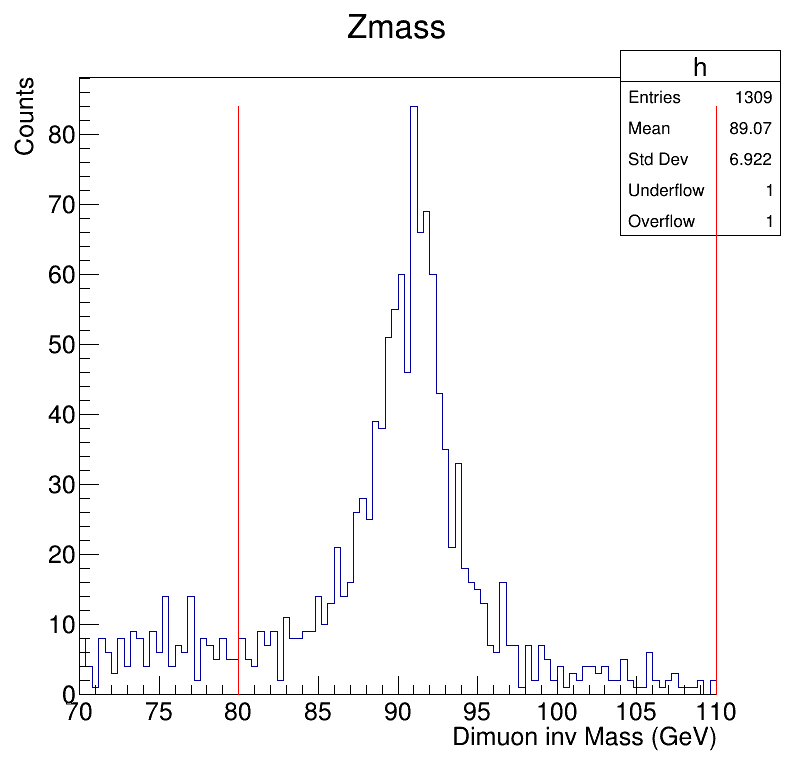

In [11]:
cut_Zmass_candi = (branches['Z_VtxMass'] > 80) & (branches['Z_VtxMass'] < 110)
cut_Zmass_event = ak.any(cut_Zmass_candi, axis=1)

nbins, xlow, xhigh = 100, 70, 110
h = ROOT.TH1F("h", "Zmass", nbins, xlow, xhigh)
for i in ak.flatten(branches.Z_VtxMass):
    h.Fill(i)
c = ROOT.TCanvas("c", "c", 800, 800)

h.GetXaxis().SetTitle("Dimuon inv Mass (GeV)")
h.GetYaxis().SetTitle("Counts")
ROOT.gStyle.SetOptStat(111111)
h.Draw()

line1 = ROOT.TLine(80, 0, 80, h.GetMaximum())
line2 = ROOT.TLine(110, 0, 110, h.GetMaximum())
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.Draw()
line2.Draw()

c.Draw()

branches = branches[cut_Zmass_candi][cut_Zmass_event]

print_summary(branches, "Z mass")

Number of events FourL mass: 669
Number of candidates FourL mass: 676


Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


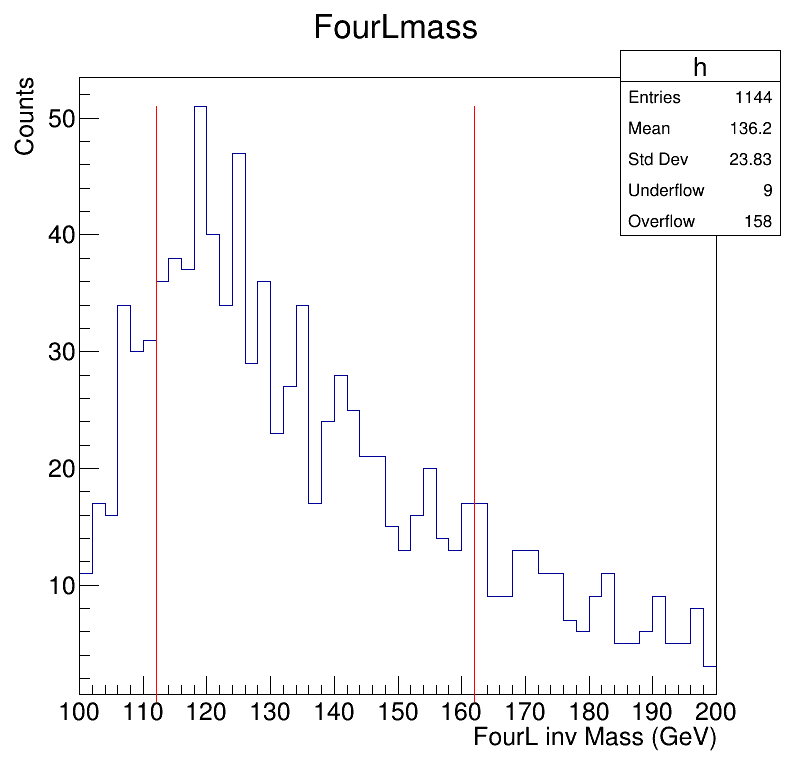

In [12]:
cut_FourLmass_candi = (branches['FourL_mass'] >= 112) & (branches['FourL_mass'] <= 162)
cut_FourLmass_event = ak.any(cut_FourLmass_candi, axis=1)

nbins, xlow, xhigh = 50, 100, 200
h = ROOT.TH1F("h", "FourLmass", nbins, xlow, xhigh)
for i in ak.flatten(branches.FourL_mass):
    h.Fill(i)
c = ROOT.TCanvas("c", "c", 800, 800)

h.GetXaxis().SetTitle("FourL inv Mass (GeV)")
h.GetYaxis().SetTitle("Counts")
ROOT.gStyle.SetOptStat(111111)
h.Draw()

line1 = ROOT.TLine(112, 0, 112, h.GetMaximum())
line2 = ROOT.TLine(162, 0, 162, h.GetMaximum())
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.Draw()
line2.Draw()

c.Draw()

branches = branches[cut_FourLmass_candi][cut_FourLmass_event]

print_summary(branches, "FourL mass")

In [13]:
cut_YmvaIso_candi = branches['Y_mvaIsoWP90_1'] & branches['Y_mvaIsoWP90_2']
cut_YmvaIso_event = ak.any(cut_YmvaIso_candi, axis=1)

branches = branches[cut_YmvaIso_candi][cut_YmvaIso_event]

print_summary(branches, "YmvaIso")

Number of events YmvaIso: 6
Number of candidates YmvaIso: 6
